## **1. Importing Required Libraries**

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor


In [4]:
%matplotlib inline

# **2. Gathering and Observing Data**

In [5]:
# Load the dataset to the project with the help of read_csv() and observe the first 5 columns
data = pd.read_csv("Melbourne_housing_FULL.csv")
df_copy = data.copy()
df_copy.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
# Find the shape, number of columns and size of the dataset
print(f"Shape: {df_copy.shape}")
print(f"Size: {df_copy.size}")
print(f"Number of Columns: {len(df_copy.columns)}")

Shape: (34857, 21)
Size: 731997
Number of Columns: 21


Show the information of the dataset, which contains the number of columns, column
labels, column data types, memory usage, range index, and the number of cells in
each column (non-null values).


In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

As we can see we have a lot of null values in columns like Bedroom2, Bathroom, Car etc.

In [8]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

## **2. EDA**

In [9]:
# Examine the descriptive statistics of dataset
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


**The values of some variables are given as objects. At the same time, we observe
that there are also categorical values. This might give us trouble when examining the
dataset. Therefore, in such cases, we need to define the variables categorically.**

In [10]:
print(df_copy.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [11]:
obj_cols = [obj for obj in df_copy.select_dtypes(['object']).columns]
obj_cols

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

In [12]:
# Convert objects to categorical variables
for col in obj_cols:
  df_copy[col] = df_copy[col].astype('category')

In [13]:
category_columns = df_copy.select_dtypes(['category']).columns
print(df_copy.select_dtypes(['category']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [14]:
# Convert to date object
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

C:\Users\msi\AppData\Local\Temp\ipykernel_16516\3899940685.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_copy['Date'] = pd.to_datetime(df_copy['Date'])


In [15]:
# Confirm changes
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

In [16]:
print(df_copy.select_dtypes(include=['int64', 'float64']).columns)

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')


**Check for duplicate data. If there are duplicate data, clear them from the dataset.**

**'Rooms' and 'Bedroom2' both contain information on the number of rooms of a home has, but reported from different sources.**

In [17]:
df_copy[df_copy.duplicated(subset=["Rooms", "Bedroom2", "Address", "Suburb"], keep=False)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
26,Abbotsford,22 Park St,4,h,1985000.0,S,Biggin,2016-12-11,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,-37.80840,144.99420,Northern Metropolitan,4019.0
64,Abbotsford,22 Park St,4,h,NaN,W,Biggin,2016-07-30,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,-37.80840,144.99420,Northern Metropolitan,4019.0
67,Airport West,50 Bedford St,3,h,730000.0,VB,Nelson,2016-03-12,13.5,3042.0,...,2.0,1.0,0.0,145.0,1965.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0
68,Airport West,50 Bedford St,3,h,770000.0,SP,Nelson,2017-04-03,13.5,3042.0,...,2.0,1.0,0.0,145.0,1965.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0
74,Airport West,4/9 West Ct,2,t,420000.0,VB,Barry,2016-04-06,13.5,3042.0,...,NaN,NaN,NaN,NaN,NaN,Moonee Valley City Council,NaN,NaN,Western Metropolitan,3464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34636,Preston,4 Evelyn St,5,h,1570000.0,SP,McGrath,2018-02-24,8.4,3072.0,...,3.0,2.0,564.0,317.0,1935.0,Darebin City Council,-37.73740,144.99115,Northern Metropolitan,14577.0
34696,Seddon,38 Alfred St,3,h,NaN,S,hockingstuart,2018-02-24,5.1,3011.0,...,2.0,2.0,243.0,132.0,2000.0,Maribyrnong City Council,-37.80573,144.88570,Western Metropolitan,2417.0
34761,Sunshine North,31 Westmoreland Rd,3,h,830000.0,S,Bells,2018-02-24,10.5,3020.0,...,1.0,3.0,585.0,NaN,NaN,Brimbank City Council,-37.77467,144.83490,Western Metropolitan,4217.0
34770,Sydenham,8 Brogil Wk,6,h,665000.0,PI,Barry,2018-02-24,18.0,3037.0,...,NaN,NaN,NaN,NaN,NaN,Brimbank City Council,NaN,NaN,Western Metropolitan,3640.0


In [18]:
# They are mostly same
df_copy[["Bedroom2", "Rooms"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Bedroom2,26640.0,3.084647,0.980690,0.0,2.0,3.0,4.0,30.0
Rooms,34857.0,3.031012,0.969933,1.0,2.0,3.0,4.0,16.0


In [19]:
# Examine Rooms v Bedroom2
df_copy['Rooms V Bedroom2'] = df_copy['Rooms'] - df_copy['Bedroom2']
df_copy["Rooms V Bedroom2"].describe().T

count    26640.000000
mean         0.016254
std          0.317298
min        -27.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: Rooms V Bedroom2, dtype: float64

In [20]:
# There is no need for additional same rows like Bedroom2, Rooms V Bedroom2
df_copy = df_copy.drop(["Rooms V Bedroom2", "Bedroom2"], axis = 1)

In [21]:
df_copy.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [22]:
# Only one row duplicated
duplicate_rows = df_copy[df_copy.duplicated()]

In [23]:
# Only one row because of duplication dropped
df_copy = df_copy.drop_duplicates()
df_copy.shape

(34856, 20)

### **The dataset contains the year the home was built. Although this is being measured by the specific year, what this variable is really probing is the age of the home.**

In [24]:
df_copy["Age"] = 2023 - df_copy["YearBuilt"]

### **Outlier Detection With Z-Score**

In [25]:
def detect_outliers(df, col):
  # Compute Z Score
  cr_mean = np.nanmean(df[col].values.tolist())
  cr_std = np.nanstd(df[col].values.tolist())
  df["zscore"] =  (df[col]-cr_mean) / cr_std
  df = df[(df["zscore"] < 3) & df["zscore"] > -3]
  #df_result = df.drop("zscore", axis=1)
  return df

In [26]:
# Outliers in numerical columns like Landsize, BuildingArea will be detected and removed
numeric_columns = df_copy.select_dtypes(include=["int64", "float64"]).columns
numeric_columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

In [27]:
for col in ["Landsize", "BuildingArea", "YearBuilt"]:
  col_mean = df_copy[col].mean()
  col_std = df_copy[col].std()
  df_copy = df_copy[(((df_copy[col]-col_mean) / col_std) < 3) & (((df_copy[col]-col_mean) / col_std) > -3)]


In [28]:
df_copy

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,123.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,123.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,9.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,2.5,3067.0,...,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0,17.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05,2.5,3067.0,...,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,2018-02-24,25.5,3750.0,...,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0,11.0
34850,Wollert,15 Rockgarden Wy,3,h,NaN,SP,LJ,2018-02-24,25.5,3750.0,...,2.0,268.0,135.0,2016.0,Whittlesea City Council,-37.61094,145.04281,Northern Metropolitan,2940.0,7.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,5.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,...,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,23.0


## **Find and remove the missing values on the dataset**

In [29]:
for col in numeric_columns:
  df_copy[col] = df_copy[col].fillna(df_copy[col].mode().iloc[0])

In [30]:
# There are no NaN values anymore in our data frame
df_copy.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Age              0
dtype: int64

## **Data Visualization**



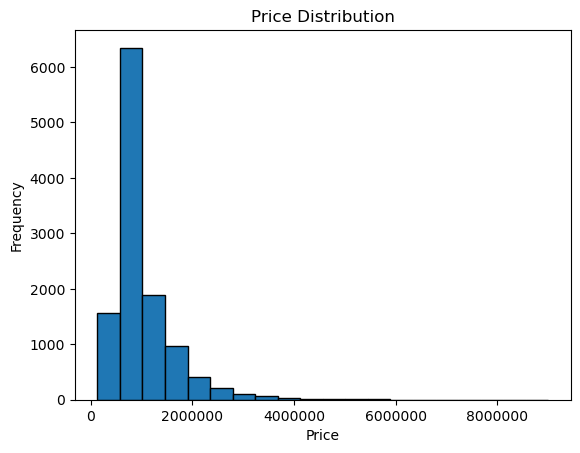

In [31]:
# Build a Histogram to visualize price distribution

price_data = df_copy["Price"]

plt.hist(price_data, bins=20, edgecolor='k')  # 'bins' sayısı ve kenar rengi isteğe bağlıdır
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.ticklabel_format(axis='both', style='plain')  # Bilimsel gösterimden çıkartma
plt.show()

House Prices are distributed mainly in the intervall between 600.000 - 1.200.00

**Draw a pair plot to see the relationship between all numerical variables and
the price variable.**

C:\Users\msi\AppData\Local\Temp\ipykernel_16516\1933831613.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(),linewidth = 1,  annot=True)


<Axes: >

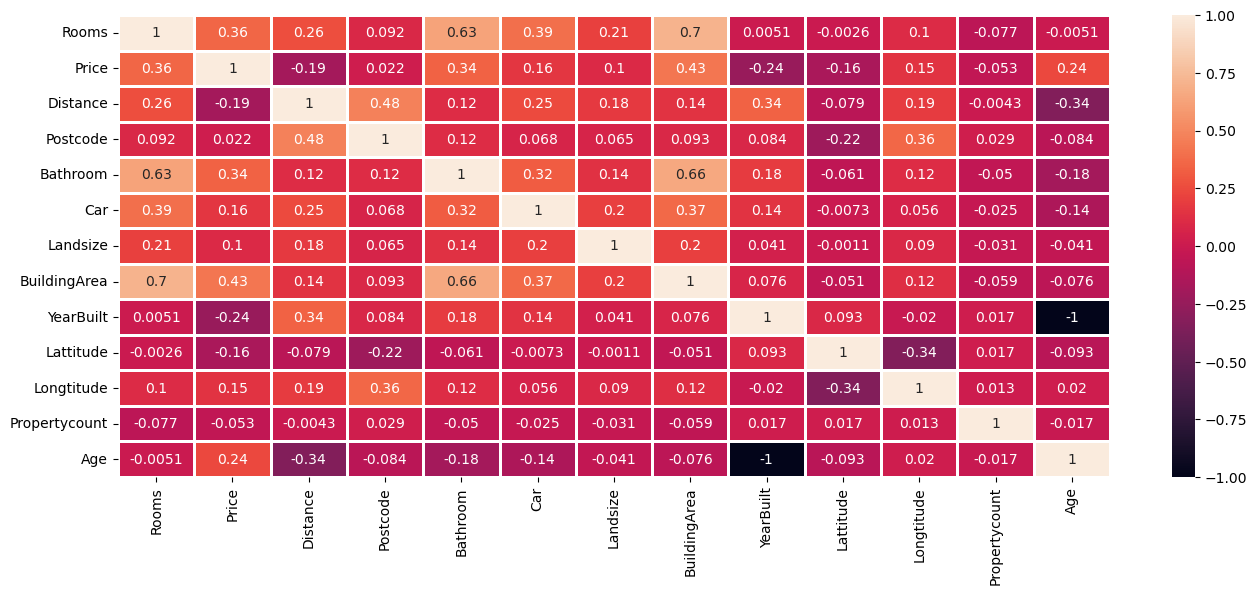

In [32]:
plt.figure(figsize=(16,6))
sns.heatmap(df_copy.corr(),linewidth = 1,  annot=True)


**Weak Positive Correlation**

Age and Price

**Strong Positive Correlation**

Rooms and Price

Bathroom and Price

Building Area and Price

In [33]:
# Identify numeric features
numeric_columns = df_copy.select_dtypes(include = ['float64','int64']).columns

In [34]:
numeric_columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

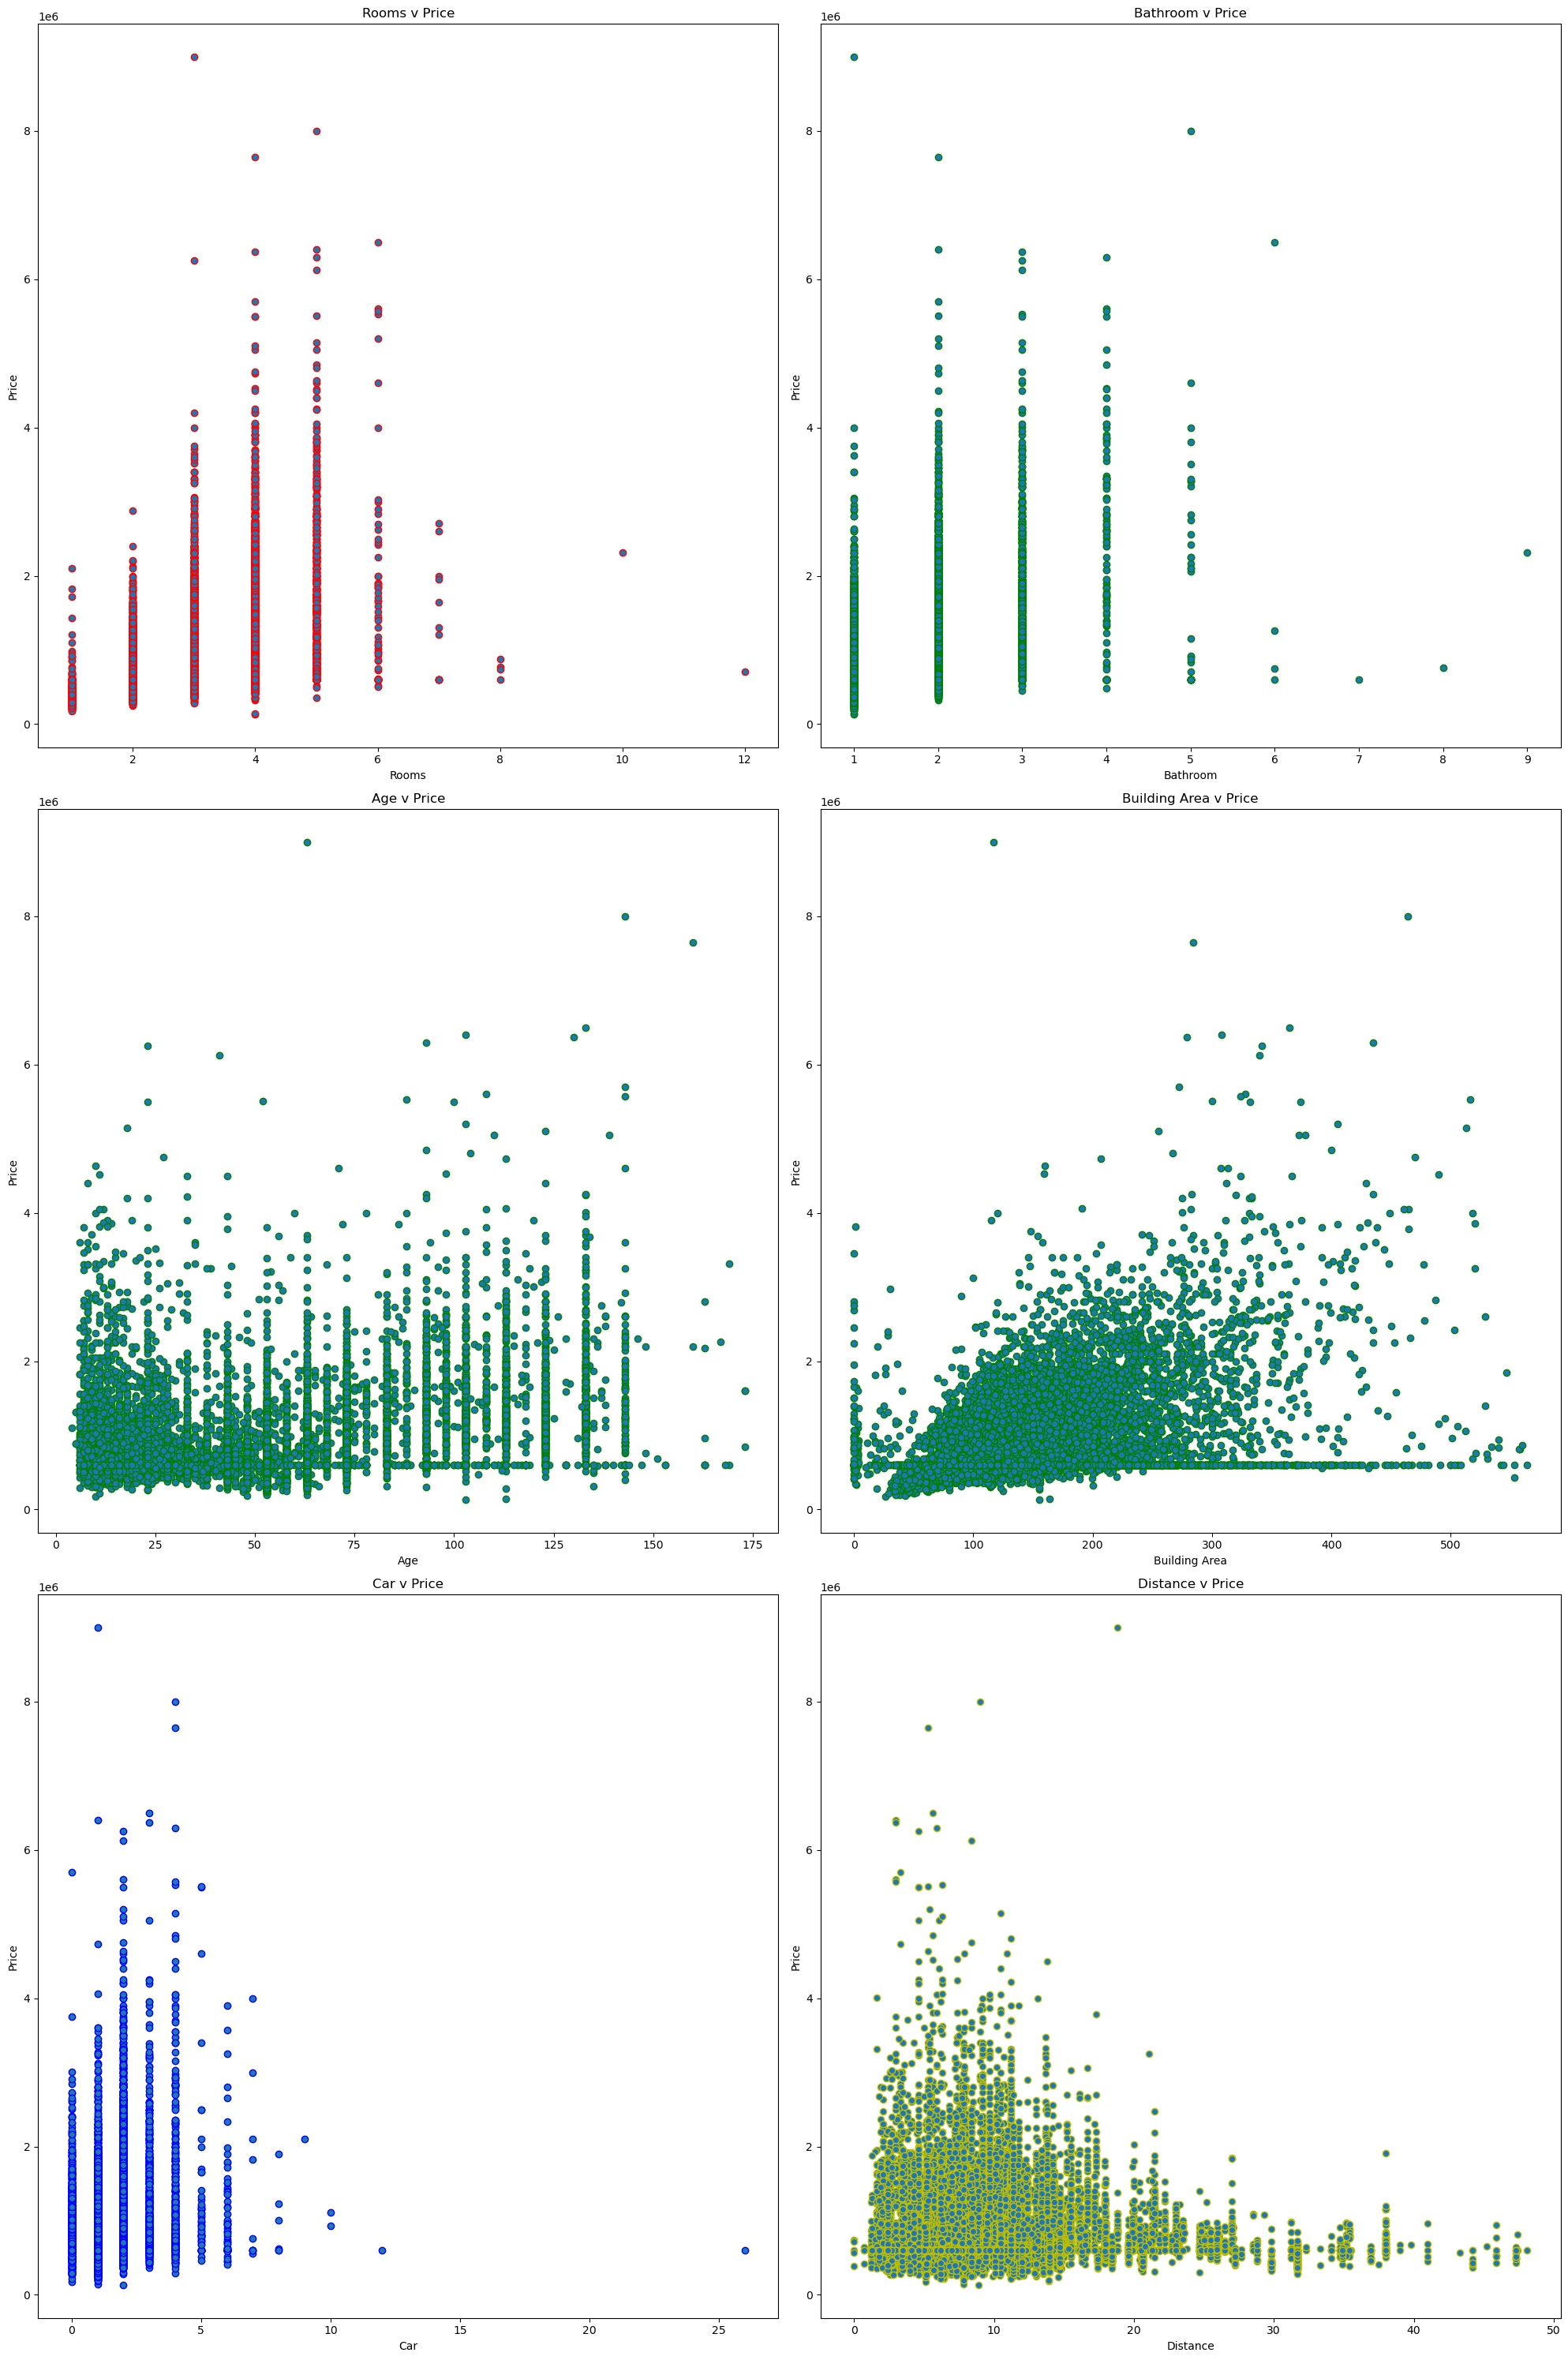

In [35]:
# Suplots of numeric features v price
fig, axes = plt.subplots(3,2, figsize=(20,30))

# Plot [0,0] Rooms v Price
axes[0,0].scatter(x = "Rooms", y = "Price", data=df_copy, edgecolor="r")
axes[0,0].set_xlabel("Rooms")
axes[0,0].set_ylabel("Price")
axes[0,0].set_title("Rooms v Price")

# Plot [0,1] Bathroom v Price
axes[0,1].scatter(x = 'Bathroom', y = 'Price', data = df_copy, edgecolor = 'g')
axes[0,1].set_xlabel('Bathroom')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Bathroom v Price')

# Plot [1,0] Age v Price
axes[1,0].scatter(x = "Age", y = "Price", data=df_copy, edgecolor="g")
axes[1,0].set_xlabel("Age")
axes[1,0].set_ylabel("Price")
axes[1,0].set_title("Age v Price")

# Plot [1,1] BuildingArea v Price
axes[1,1].scatter(x = "BuildingArea", y = "Price", data=df_copy, edgecolor="g")
axes[1,1].set_xlabel("Building Area")
axes[1,1].set_ylabel("Price")
axes[1,1].set_title("Building Area v Price")

# Plot [2,0]
axes[2,0].scatter(x = "Car", y = "Price", data=df_copy, edgecolor="b")
axes[2,0].set_xlabel("Car")
axes[2,0].set_ylabel("Price")
axes[2,0].set_title("Car v Price")

# Plot [2,1] Distance vs Price -> Negative Correlation
axes[2,1].scatter(x = "Distance", y = "Price", data = df_copy, edgecolor = "y")
axes[2,1].set_xlabel("Distance")
axes[2,1].set_ylabel("Price")
axes[2,1].set_title("Distance v Price")

plt.tight_layout()
plt.show()




# **One Hot Encoding**

One-hot encoding turns your categorical data into a binary vector representation.

In [36]:
#df_copy = pd.get_dummies(data=df_copy, columns=category_columns)
#df_copy = pd.get_dummies(data=df_copy, columns=["Method"])

In [37]:
# LabelEncoder
labelEncoder = LabelEncoder()

In [38]:
df_copy["Regionname"] = labelEncoder.fit_transform(df_copy["Regionname"])

In [39]:
# New numerical values of Regionname column
df_copy["Regionname"].value_counts()

5    3882
2    3264
6    2447
0    1348
4     507
3      71
1      70
7      54
Name: Regionname, dtype: int64

# **Model Selection**

In [40]:
categorical_columns = df_copy.select_dtypes(["category"]).columns.tolist()
unneccessary_columns = ['Postcode', 'Lattitude', 'Longtitude']
label = ['Price']

In [41]:
# Split
# Create features variable
X = df_copy.drop(categorical_columns + unneccessary_columns + label, axis=1)

In [42]:
# X.columns
# All necessary numerical features which have strong correlation with price
X.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Age
2,2,2.5,1.0,0.0,156.0,79.0,1900.0,2,4019.0,123.0
4,3,2.5,2.0,0.0,134.0,150.0,1900.0,2,4019.0,123.0
6,4,2.5,1.0,2.0,120.0,142.0,2014.0,2,4019.0,9.0
7,4,2.5,2.0,2.0,400.0,220.0,2006.0,2,4019.0,17.0
11,3,2.5,2.0,0.0,245.0,210.0,1910.0,2,4019.0,113.0


In [43]:
# Create target variable
y = df_copy["Price"]

In [44]:
# Previewing label
y.head()

2     1035000.0
4     1465000.0
6     1600000.0
7      600000.0
11    1876000.0
Name: Price, dtype: float64

In [45]:
# Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
# Shape of training data
X_train.shape

(9314, 10)

In [47]:
# Shape of testing data
X_test.shape

(2329, 10)

In [48]:
# Shape of labels for training
y_train.shape

(9314,)

In [49]:
# Shape of labels for testing
y_test.shape

(2329,)

**Train your models using preprocessed data with the models mentioned**

In [50]:
# Creating the model
linear_reg = LinearRegression()

In [51]:
# Fit model to training data
linear_reg.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predict
# Predicting test set results
y_pred = linear_reg.predict(X_test)

## **Regression Evaluation Metrics**
Three common evaluation metrics for regresson problems:

1.   Mean Absolute Error (MAE)
2.   Mean Squared Error (MSE)
3.   Root Mean Squared Error (RMSE)

All basic variations on the difference between what you predicted and the true values.

**Comparing these metrics:**

MAE is the easiest to understand, because it's the average error.
MSE more popular than MAE, because MSE "punishes" larger errors, tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units (target units) .

All of these are loss functions, because we want to minimize them.

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [54]:
# Scores
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE:  346033.7725253574
MSE:  280228300259.3413
RMSE:  529365.9417258928


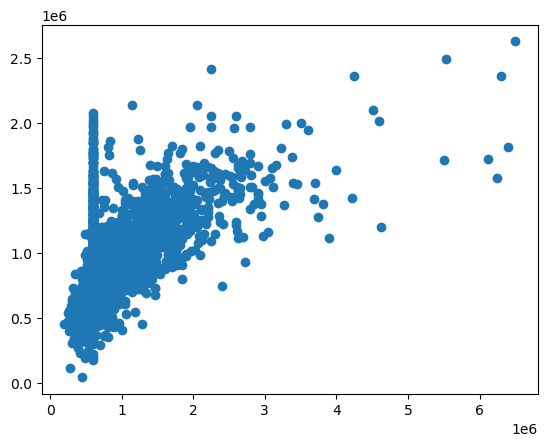

In [55]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)

In [56]:
coef_df = pd.DataFrame(data=linear_reg.coef_, index=X.columns, columns = ["Coefficients"])
coef_df

,Coefficients
Rooms,58732.939617
Distance,-18736.639130
Bathroom,116899.066350
Car,33771.060577
Landsize,42.564308
BuildingArea,2344.639676
YearBuilt,-1944.571679
Regionname,7997.401952
Propertycount,-1.379313
Age,1944.571679


In [61]:
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
    },
    'CatBoostRegressor': {
        'model': CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)
    }
}


In [62]:
# MAE,MSE, RMSE results of all models
results = dict()

In [64]:
for model_name, model_config in models.items():
    model = model_config['model']
    model.fit(X_train, y_train) # Training
    y_pred = model.predict(X_test) # Predictions
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("*******************")
    print(f"{model_name}: ")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {np.sqrt(mse)}")
    print(f"R2 Score: {r2}" )
    print("********************\n")
    
    results[model_name] = {
        "MAE": mae, 
        "MSE": mse, 
        "RMSE": np.sqrt(mse),
        "R2 Score": r2
    } 
    

C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.766e+14, tolerance: 3.653e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.278e+15, tolerance: 3.653e+11
  model = cd_fast.enet_coordinate_descent(


*******************
Lasso: 
MAE: 346033.68169442145
MSE: 280228239907.20215
RMSE: 529365.8847217133
R2 Score: 0.31673218872691866
********************

*******************
LinearRegression: 
MAE: 346033.7725253574
MSE: 280228300259.3413
RMSE: 529365.9417258928
R2 Score: 0.31673204157303425
********************

*******************
Ridge: 
MAE: 346033.22796820407
MSE: 280227703381.9512
RMSE: 529365.377959261
R2 Score: 0.31673349691211106
********************

*******************
ElasticNet: 
MAE: 346451.41658241604
MSE: 281274764428.8879
RMSE: 530353.4335034401
R2 Score: 0.31418049543714666
********************

*******************
KNeighborsRegressor: 
MAE: 343740.01811936457
MSE: 317876639397.9126
RMSE: 563805.4978429286
R2 Score: 0.22493580330027196
********************

*******************
RandomForestRegressor: 
MAE: 297337.8837945981
MSE: 238735151015.508
RMSE: 488605.3121032435
R2 Score: 0.41790290599429925
********************

*******************
GradientBoostingRegressor: 
MAE

In [65]:
results_df = pd.DataFrame(index=list(results.keys()), 
                          data=list(results.values()), 
                          columns=["MAE","MSE","RMSE", "R2"])

results_df.to_csv("Model_Results.csv")